In [1]:
# source: https://softhints.com/merge-multiple-json-files-pandas-dataframe/
import numpy as np
import pandas as pd
import glob, os, json

json_dir = './data/json'
dir_list = glob.glob(os.path.join(json_dir, 'search_*'))

In [2]:
data_list = [] # list of dicts
for dir in dir_list:
    file_list = glob.glob(os.path.join(dir, '*.json'))
    result_count = 0
    name = ""
    for file in file_list:
        f = open(file) # file is a path to a json file
        data = json.load(f)
        name = file.split('/')[-2].split('search_')[-1]
        result_count = result_count + data['meta']['result_count']
        f.close()
    data_list.append({'name': name, 'result_count': result_count})

In [3]:
count_data = pd.DataFrame(data_list)
print(count_data.head())
print(f'data: {count_data.shape}')

                   name  result_count
0                                   0
1  Leon Deandre Simpson             1
2                                   0
3                                   0
4                                   0
data: (5333, 2)


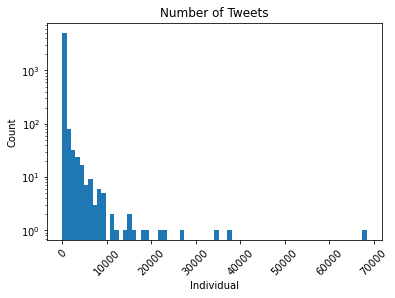

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.title('Number of Tweets')
plt.yscale('log')
plt.hist(count_data['result_count'], bins=70)
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Individual')
plt.show()

In [5]:
count_data[count_data['result_count'] > 10000]

,name,result_count
494,Na Li,22102
621,Jose Leon,11216
691,Anthony Davis,37630
937,Jose Luis Sanchez,11132
1186,Daniel Garcia,16370
1490,Daniel Ramirez,15500
1559,Jose Luis Rodriguez,18214
1829,Gracie Anne Muehlberger,14317
2171,David Ordaz Jr,14887
3062,Juan Cortez,68385
